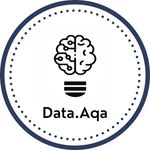

<br>

# <font color = #21618C> Análise Exploratória

-------------------

<br>

## <font color = #21618C> Objetivo da Aula

<br>

O objetivo desta aula é explorar algumas funcionalidades do pandas em um contexto prático. Desta maneira conseguiremos exercitar a nossa capacidade de exploração dos dados. 
    
O nosso contexto prático será a análise de certas informações das eleições presidenciais do segundo turno de 2018. 

<br>

In [ ]:
# Realizando a Importação das Bibliotecas Necessárias para a Análise 

import pandas as pd

In [ ]:
# Carregando o conjunto de dados 

dados = pd.read_csv('Dados/resultados_candidato_municipio.csv')

In [ ]:
# Verificando as colunas do Dataset

dados.info()

In [ ]:
# Visualizando os primeiros cinco registros 

dados.head()

In [ ]:
# Selecionando os dados das eleições de 2018 

dados_eleicoes_2018 = dados[dados['ano'] == 2018]

In [ ]:
# Verificando as candidaturas possíveis 

dados_eleicoes_2018['cargo'].unique()

In [ ]:
# Selecionando a candidatura para presidente 

eleicoes_presidenciais_2018 = dados_eleicoes_2018[dados_eleicoes_2018['cargo'] == 'presidente']

In [ ]:
# Visualizando o nosso conjunto de dados

eleicoes_presidenciais_2018

In [ ]:
# Verificando o resultado de votos do Haddad e do Bolsonaro

votos_haddad = eleicoes_presidenciais_2018[(eleicoes_presidenciais_2018['numero_candidato'] == 13) & (eleicoes_presidenciais_2018['turno'] == 2)]
votos_bolsonaro = eleicoes_presidenciais_2018[(eleicoes_presidenciais_2018['numero_candidato'] == 17) & (eleicoes_presidenciais_2018['turno'] == 2)]

In [ ]:
# Agrupando o total de votos dos candidatos por Estado

total_votos_haddad = votos_haddad.groupby(by='sigla_uf').sum()
total_votos_bolsonaro = votos_bolsonaro.groupby(by='sigla_uf').sum()

In [ ]:
# Visualizando o DataFrame

total_votos_bolsonaro[['votos']]

In [ ]:
# Verificando o total de votos do Bolsonaro

print('Bolsonaro :',total_votos_bolsonaro['votos'].sum())
print('Haddad :',total_votos_haddad['votos'].sum())

<br>

#### <font color = #21618C> Matéria Anunciando o Vencedor da Presidência em 2018 :

https://g1.globo.com/politica/eleicoes/2018/apuracao/presidente.ghtml

<br>

## <font color = #21618C> Realizando Análise dos NaNs
    

-----------------------------
<br>

In [ ]:
# Verificando valores nulos

votos_haddad.isna().sum()

In [ ]:
# Verificando valores nulos

votos_bolsonaro.isna().sum()

In [ ]:
# Verificando os Ids de Município faltantes 

ids_de_municipio_faltantes_bolsonaro = votos_bolsonaro[votos_bolsonaro[['id_municipio']].isna().any(axis = 1)]
ids_de_municipio_faltantes_haddad = votos_haddad[votos_haddad[['id_municipio']].isna().any(axis = 1)]

In [ ]:
# Verificando os estados com o id de município faltando

print('Municípios Faltantes Bolsonaro :',ids_de_municipio_faltantes_bolsonaro['sigla_uf'].unique())
print('Municípios Faltantes Haddad :',ids_de_municipio_faltantes_haddad['sigla_uf'].unique())

<br>

Não existe nenhum estado que não contenha a identificação do Município. Os ids de município não estão presentes pois os votantes estão localizados no exterior

<br>

## <font color = #21618C> Retirando os NaNs e Avaliando a Perda de Dados

------------------------------------

<br>

In [ ]:
# Retirando os NaNs 

print('Serão eliminados ',votos_haddad.shape[0] - votos_haddad.dropna(axis = 0).shape[0],'registros após a retirada de votantes do exterior.')
print('O conjunto de dados inicial possui',votos_bolsonaro.shape[0],'registros')

In [ ]:
# Verificando perda de votos 

print('Quantidade de Votos no exterior : ', ids_de_municipio_faltantes_bolsonaro['votos'].sum())
print('Quantidade de Votos após a retirada do exterior : ', votos_bolsonaro['votos'].sum() - ids_de_municipio_faltantes_bolsonaro['votos'].sum())
print('Quantidade de Votos original do Bolsonaro :', votos_bolsonaro['votos'].sum())

In [ ]:
# Verificando perda de votos 

print('Quantidade de Votos no exterior : ', ids_de_municipio_faltantes_haddad['votos'].sum())
print('Quantidade de Votos após a retirada do exterior : ', votos_haddad['votos'].sum() - ids_de_municipio_faltantes_haddad['votos'].sum())
print('Quantidade de Votos original do haddad :', votos_haddad['votos'].sum())

In [ ]:
# Retirando votantes do exterior 

votos_bolsonaro.dropna(axis = 0, inplace = True)
votos_haddad.dropna(axis = 0, inplace = True)

In [ ]:
# Transformando variável categórica em string ao invés de deixar como float 

# Transformando os dados do Bolsonaro

votos_bolsonaro['id_municipio'] = votos_bolsonaro['id_municipio'].astype(int)
votos_bolsonaro['id_municipio'] = votos_bolsonaro['id_municipio'].astype(str)

# Transformando os dados do Haddad

votos_haddad['id_municipio'] = votos_haddad['id_municipio'].astype(int)
votos_haddad['id_municipio'] = votos_haddad['id_municipio'].astype(str)

<br>

## <font color = #21618C> Partindo para uma Análise Qualitativa

-----------------------------------
<br>

Queremos construir um **<font color = #21618C>índice para verificar a participação relativa** <font color = black> de cada um dos Estados na composição de votos dos participantes. Desta maneira poderemos avaliar o perfil dos votantes ao redor do País. Segue o índice proposto abaixo :

**<font color = #0a7a35> Proporção de Votos** <font color = black> = <font color = #0a677a> População que Votou <font color = black> / <font color = #7a4d0a>População Que Possui Obrigatoriedade no Voto

O nosso conjunto de dados inicial não possui os dados populacionais do ano da eleição. Iremos, portanto, realizar um cruzamento dos dados que temos com uma **<font color = #7a4d0a>base de dados populacionais fornecida pelo Ministério da Saúde**.

<br>

In [ ]:
# Carregando o conjunto de dados populacionais fornecido pelo Ministério da Sáude que foi extraído da Base dos Dados

dados_populacionais = pd.read_csv('Dados/municipio.csv')

In [ ]:
# Visualizando algumas informações do DataFrame

dados_populacionais.info()

In [ ]:
# Transformando variável categórica em string ao invés de deixar como float 

dados_populacionais['id_municipio'] = dados_populacionais['id_municipio'].astype(str)

In [ ]:
# Vendo as cinco primeiras linhas

dados_populacionais.head()

In [ ]:
# Verificando a existência de valores nulos

dados_populacionais.isna().sum()

In [ ]:
# Selecionando a população brasileira de 2018

dados_populacionais_2018 = dados_populacionais[dados_populacionais['ano'] == 2018]

In [ ]:
# Verificando as faixas etárias presentes no dataset

dados_populacionais_2018['grupo_idade'].unique()

In [ ]:
# Selecionando as faixas etárias que tem obrigatoriedade no voto 

lista_de_faixas_etarias = ['20-24 anos', '25-29 anos', '30-34 anos', '35-39 anos',
       '40-44 anos', '45-49 anos', '50-54 anos', '55-59 anos',
       '60-64 anos', '65-69 anos']


# Obs : Decidimos não considerar as faixas de 15 à 19 e 70 à 79 anos. Dentro dessas faixas existem pessoas que não possuem obrigatoriedade ao voto

In [ ]:
# Criando uma seleção com a população de 2018 que possui o voto obrigatório


populacao_com_voto_obrigatorio_2018 = dados_populacionais_2018[dados_populacionais_2018['grupo_idade'].isin(lista_de_faixas_etarias)]

In [ ]:
populacao_com_voto_obrigatorio_2018

In [ ]:
# Agregando a populacao com voto obrigatório por município

populacao_com_voto_obrigatorio_2018_por_municipio = populacao_com_voto_obrigatorio_2018.groupby(by = 'id_municipio').sum()[['populacao']]

In [ ]:
# Visualizando groupby

populacao_com_voto_obrigatorio_2018_por_municipio.head()

In [ ]:
# Transformando índice em coluna para realizar o merge

populacao_com_voto_obrigatorio_2018_por_municipio.reset_index(inplace = True)

In [ ]:
# Visualizando o DataFrame 

populacao_com_voto_obrigatorio_2018_por_municipio

In [ ]:
# Realizando um merge nos conjuntos de dados dos candidatos para mostrar a população

votos_bolsonaro = pd.merge(votos_bolsonaro, populacao_com_voto_obrigatorio_2018_por_municipio, how = 'inner')
votos_haddad = pd.merge(votos_haddad, populacao_com_voto_obrigatorio_2018_por_municipio, how = 'inner')

In [ ]:
# Visualizando o resultado 

votos_haddad

In [ ]:
# Agregando a população e a quantidade de votos por estado 

resultados_agregados_haddad = votos_haddad.groupby(by = 'sigla_uf').sum()[['populacao','votos']].reset_index()
resultados_agregados_bolsonaro = votos_bolsonaro.groupby(by = 'sigla_uf').sum()[['populacao','votos']].reset_index()

In [ ]:
# Visualizando os resultados 

resultados_agregados_bolsonaro

<br>

Temos os dados da **<font color = #d95809 >população que votou<font color = black >**. Temos os dados da maioria da **<font color = #068c2a >população que possui obrigatoriedade ao voto<font color = black >**. Agora **<font color = #076bb8 >iremos calcular a Proporção de Votos dos candidatos ao longo dos estados brasileiros <font color = black >**. 

<br>

In [ ]:
# Realizando o cálculo da proporção de votos 

resultados_agregados_bolsonaro['tx_de_votos'] = resultados_agregados_bolsonaro['votos']/resultados_agregados_bolsonaro['populacao']
resultados_agregados_haddad['tx_de_votos'] = resultados_agregados_haddad['votos']/resultados_agregados_haddad['populacao']

--------------------------
<br>

## <font color = #0f4e8c > Construindo um Mapa Coroplético 

<br>

In [ ]:
# Biblioteca utilizada para processar arquivos do tipo shape 

import geopandas as gpd

In [ ]:
# Carregando o arquivo do Shapefile 

dados_shape = gpd.read_file('Dados/BR_UF_2020.shp')

In [ ]:
# Vendo as informações do Shapefile

dados_shape.info()

In [ ]:
# Renomeando a coluna do shape_file 

dados_shape.rename(columns = {'SIGLA_UF' : 'sigla_uf'}, inplace = True)

In [ ]:
# Visualizando o DataFrame

dados_shape

In [ ]:
# Realizando a união dos dados dos candidatos com o shape 

resultados_agregados_bolsonaro_com_shape = pd.merge(dados_shape,resultados_agregados_bolsonaro, how = 'inner')
resultados_agregados_haddad_com_shape = pd.merge(dados_shape, resultados_agregados_haddad, how = 'inner')

In [ ]:
# Biblioteca utilizada para a visualização de mapas 

import geoviews as gv

In [ ]:
resultados_agregados_bolsonaro_com_shape.info()

In [ ]:
# Instanciando a extensão para fazer o mapa rodar 

gv.extension('bokeh')

In [ ]:
# Realizando o plot do mapa

gv.Polygons(resultados_agregados_haddad_com_shape, vdims=['sigla_uf', 'tx_de_votos'], label='Tx. de Votos do Haddad por Estado').opts(
    tools=['hover'], width=550, height=700, color='tx_de_votos',
    colorbar=True, toolbar='above', xaxis=None, yaxis=None)

<br>

## <font color = darkgreen> Sintetizando

-----------------------


<br>

Nesta aula vimos alguns conteúdos, dentre eles estão :

<br>

- **<font color = darkgreen> Filtragens** para obtenção de dados de interesse;
<br>
    
- Como realizar **<font color = darkgreen>  agrupamentos de dados** <font color = black> para obter **<font color = darkgreen>resultados agregados**;
<br>

- Como realizar **<font color = darkgreen> merges**;
<br>
    
- Breve visualização geográfica com arquivos do shape do Brasil.

-----------------------


<br>

### <font color = #21618C> Pontuações :


<br>

- Não foi considerada a população em que o voto era facultativo, fator que pode impactar a análise da população votante ;

- Também não foi considerada a população com impedimento técnico/jurídico no momento de se considerar a população votante.


Informações sobre as condições para o voto em 2018 podem ser acessadas em : https://agenciabrasil.ebc.com.br/politica/noticia/2018-09/eleicoes-2018-saiba-quem-pode-e-quem-nao-pode-votar

-------------------
<br>

###  <font color = #21618C> Links dos Datasets Utilizados :


<br>

Dados Populacionais : https://basedosdados.org/dataset/br-ms-populacao


Dados Eleitorais : https://basedosdados.org/dataset/br-tse-eleicoes 

<br>

Obs. : No caso dos dados eleitorais, foi utilizado o conjunto de dados "resultados_candidato_municipio"


<br>

---------------------
<br>


##  <font color = #21618C> Material Elaborado Por :
    
<br>
<br>
    
    

<tr>
<td> <img src="imagens/Thiago.png" width = "150" align = "left"/> </td>
</tr>

<br>



<br>


<br>

<tr>
<td> <a href="https://www.linkedin.com/in/thiagopd/" > <img src = "imagens/linkedin.png" width = "25"  align = "left" /> </a>  </td>             <td> <a href="https://github.com/tp-duarte" > <img src = "imagens/GitHub-Logo.png" width = "60" height = "100" align = "left" /> </a>  </td>  </tr>

<pre> <font size =  5 align = 'up' > Thiago Duarte 